#Data set


In [1]:
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pathlib import Path
import matplotlib.pyplot as plt # import matplotlib
%matplotlib inline
import seaborn as sns # seaborn data visualizer
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
d11=pd.read_csv('data11.csv')
d12=pd.read_csv('data12.csv')

d21=pd.read_csv('data21.csv')
d22=pd.read_csv('data22.csv')

In [3]:
d12.drop(d12[d12['HR']<47].index, inplace = True)
d12.reset_index(inplace = True)
d12

,index,YEAR,MN,HR,DT,SLP,MSLP,DBT,WBT,DPT,RH,VP,DD,FFF,AW
0,31,1985,1,48,1,931.7,1008.6,23.6,22.0,21.3,87,25.3,0,0,0
1,32,1985,1,48,2,934.1,1011.7,21.8,21.0,20.6,93,24.3,0,0,0
2,33,1985,1,48,3,935.8,1013.6,21.2,20.4,20.0,93,23.4,0,0,0
3,34,1985,1,48,4,935.0,1012.0,24.4,20.6,18.6,70,21.4,0,0,0
4,35,1985,1,48,5,934.1,1010.8,25.4,20.2,17.4,61,19.9,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5937,11891,2001,12,48,27,937.7,1014.8,25.0,20.0,17.3,62,19.7,14,4,8
5938,11892,2001,12,48,28,937.6,1014.7,24.4,21.0,19.3,73,22.4,14,4,6
5939,11893,2001,12,48,29,936.0,1013.0,25.0,19.0,15.5,56,17.6,14,4,6
5940,11894,2001,12,48,30,936.2,1013.4,23.8,19.2,16.6,64,18.9,14,4,4


In [4]:
#d12.drop(['YEAR'], axis = 1)
d12.drop(d12.columns[[0,1, 2, 3,4,14]], axis = 1, inplace = True)
d12

,SLP,MSLP,DBT,WBT,DPT,RH,VP,DD,FFF
0,931.7,1008.6,23.6,22.0,21.3,87,25.3,0,0
1,934.1,1011.7,21.8,21.0,20.6,93,24.3,0,0
2,935.8,1013.6,21.2,20.4,20.0,93,23.4,0,0
3,935.0,1012.0,24.4,20.6,18.6,70,21.4,0,0
4,934.1,1010.8,25.4,20.2,17.4,61,19.9,0,0
...,...,...,...,...,...,...,...,...,...
5937,937.7,1014.8,25.0,20.0,17.3,62,19.7,14,4
5938,937.6,1014.7,24.4,21.0,19.3,73,22.4,14,4
5939,936.0,1013.0,25.0,19.0,15.5,56,17.6,14,4
5940,936.2,1013.4,23.8,19.2,16.6,64,18.9,14,4


In [5]:
df = pd.concat([d11,d12],axis=1)
df

,YEAR,MN,DT,MAX,MIN,AW,RF,DRNRF(hrs),DRNRF(mnts),SLP,MSLP,DBT,WBT,DPT,RH,VP,DD,FFF
0,1985,1,1,NaN,19.6,1,4.4,,,931.7,1008.6,23.6,22.0,21.3,87,25.3,0,0
1,1985,1,2,NaN,19.5,0,22.6,1,35,934.1,1011.7,21.8,21.0,20.6,93,24.3,0,0
2,1985,1,3,NaN,18.4,0,1.0,1,30,935.8,1013.6,21.2,20.4,20.0,93,23.4,0,0
3,1985,1,4,NaN,18.6,0,2.5,,,935.0,1012.0,24.4,20.6,18.6,70,21.4,0,0
4,1985,1,5,NaN,17.9,0,0.0,0,0,934.1,1010.8,25.4,20.2,17.4,61,19.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6106,2001,12,27,27.5,16.5,3,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6107,2001,12,28,28.0,16.4,4,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6108,2001,12,29,27.0,16.0,3,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6109,2001,12,30,26.5,15.0,3,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#removing the null rows in data base
df=df.dropna()

In [7]:
features_list = list(df.drop(columns='RF').columns)
columns = list(df.columns)
print(features_list)

['YEAR', 'MN', 'DT', 'MAX', 'MIN', 'AW', 'DRNRF(hrs)', 'DRNRF(mnts)', 'SLP', 'MSLP', 'DBT', 'WBT', 'DPT', 'RH', 'VP', 'DD', 'FFF']


In [8]:
m=[]
l=[]
for i in df['DRNRF(mnts)']:
    if(str(i).replace(" ",'')!=''):
        m+=[float(i)]
    else:
        m+=[0]
for i in df['DRNRF(hrs)']:
    if(str(i).replace(" ",'')!=''):
        l+=[float(i)*60]
    else:
        l+=[0]
for i in range(len(m)):
    m[i]+=l[i]

df['DRNF']=m

df


C:\Users\DHARAN~1\AppData\Local\Temp/ipykernel_11328/4018324398.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DRNF']=m


,YEAR,MN,DT,MAX,MIN,AW,RF,DRNRF(hrs),DRNRF(mnts),SLP,MSLP,DBT,WBT,DPT,RH,VP,DD,FFF,DRNF
42,1985,2,15,32.7,18.5,5,0.0,0,0,928.6,1003.3,31.6,20.0,12.9,32,14.9,18,6,0.0
43,1985,2,16,31.8,19.1,1,0.0,0,0,928.6,1003.3,31.8,19.6,11.8,30,13.8,18,4,0.0
44,1985,2,17,30.6,18.6,2,0.0,0,0,927.7,1002.2,31.2,19.4,11.9,31,13.9,14,6,0.0
45,1985,2,18,29.8,17.6,5,0.0,0,0,926.4,1001.1,31.0,19.4,12.0,31,14,0,0,0.0
46,1985,2,19,28.8,17.4,3,0.0,0,0,927.4,1002.4,29.4,20.0,14.5,40,16.5,9,12,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5937,2001,7,10,32.0,23.5,11,0.0,0,0,937.7,1014.8,25.0,20.0,17.3,62,19.7,14,4,0.0
5938,2001,7,11,32.5,24.0,10,1.8,0,8,937.6,1014.7,24.4,21.0,19.3,73,22.4,14,4,8.0
5939,2001,7,12,31.5,23.5,9,0.0,0,0,936.0,1013.0,25.0,19.0,15.5,56,17.6,14,4,0.0
5940,2001,7,13,32.5,24.0,7,0.0,0,0,936.2,1013.4,23.8,19.2,16.6,64,18.9,14,4,0.0


In [9]:
df=df.drop(columns=['DRNRF(hrs)', 'DRNRF(mnts)'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5787 entries, 42 to 5941
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YEAR    5787 non-null   int64  
 1   MN      5787 non-null   int64  
 2   DT      5787 non-null   int64  
 3   MAX     5787 non-null   float64
 4   MIN     5787 non-null   float64
 5   AW      5787 non-null   object 
 6   RF      5787 non-null   float64
 7   SLP     5787 non-null   float64
 8   MSLP    5787 non-null   float64
 9   DBT     5787 non-null   float64
 10  WBT     5787 non-null   float64
 11  DPT     5787 non-null   float64
 12  RH      5787 non-null   object 
 13  VP      5787 non-null   object 
 14  DD      5787 non-null   object 
 15  FFF     5787 non-null   object 
 16  DRNF    5787 non-null   float64
dtypes: float64(9), int64(3), object(5)
memory usage: 813.8+ KB


In [11]:
FFF=[]
AW=[]
RH=[]
VP=[]
DD=[]
for i in df['FFF']:
    if(str(i).replace(" ",'')!=''):
        FFF+=[float(i)]
    else:
        FFF+=[0]
for i in df['AW']:
    if(str(i).replace(" ",'')!='' and str(i)!='AW'):
        AW+=[float(i)]
    else:
        AW+=[0]
for i in df['RH']:
    if(str(i).replace(" ",'')!=''):
        RH+=[float(i)]
    else:
        RH+=[0]
for i in df['VP']:
    if(str(i).replace(" ",'')!=''):
        VP+=[float(i)]
    else:
        VP+=[0]
for i in df['DD']:
    if(str(i).replace(" ",'')!=''):
        DD+=[float(i)]
    else:
        DD+=[0]
df['FFF']=FFF
df['AW']=AW
df['RH']=RH
df['VP']=VP
df['DD']=DD




In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5787 entries, 42 to 5941
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YEAR    5787 non-null   int64  
 1   MN      5787 non-null   int64  
 2   DT      5787 non-null   int64  
 3   MAX     5787 non-null   float64
 4   MIN     5787 non-null   float64
 5   AW      5787 non-null   float64
 6   RF      5787 non-null   float64
 7   SLP     5787 non-null   float64
 8   MSLP    5787 non-null   float64
 9   DBT     5787 non-null   float64
 10  WBT     5787 non-null   float64
 11  DPT     5787 non-null   float64
 12  RH      5787 non-null   float64
 13  VP      5787 non-null   float64
 14  DD      5787 non-null   float64
 15  FFF     5787 non-null   float64
 16  DRNF    5787 non-null   float64
dtypes: float64(14), int64(3)
memory usage: 813.8 KB


In [13]:
columns = list(df.columns)
print(columns)

['YEAR', 'MN', 'DT', 'MAX', 'MIN', 'AW', 'RF', 'SLP', 'MSLP', 'DBT', 'WBT', 'DPT', 'RH', 'VP', 'DD', 'FFF', 'DRNF']


In [14]:
isnull = df.isnull().sum()
isnull

YEAR    0
MN      0
DT      0
MAX     0
MIN     0
AW      0
RF      0
SLP     0
MSLP    0
DBT     0
WBT     0
DPT     0
RH      0
VP      0
DD      0
FFF     0
DRNF    0
dtype: int64

# Multicollinearity

In [15]:
def standardize_var(x):
    mean = np.mean(x)
    std = np.sqrt(np.sum(np.square(x-mean))/(len(x)-1))
    return ((x-mean)/std)/np.sqrt(len(x)-1)
 
sdf = df.apply(standardize_var) 
sdf_X = sdf[['YEAR', 'MN', 'DT', 'MAX', 'MIN', 'AW', 'SLP', 'MSLP', 'DBT', 'WBT', 'DPT', 'RH', 'VP', 'DD', 'FFF', 'DRNF']]
corr = np.array(sdf_X.corr()) 
corr_inv = np.linalg.inv(corr) 
 
fit = ols('RF~YEAR+MN+DT+MAX+MIN+AW+SLP+MSLP+DBT+WBT+DPT+RH+VP+DD+FFF+DRNF',data=sdf).fit()
 
variables = [] 
reg_coef = [] 
vif = [] 
for i in range(len(sdf_X.columns)):
    col_name = sdf_X.columns[i]
    variables.append(col_name)
    reg_coef.append(fit.params[col_name])
    vif.append(corr_inv[i][i])
    
df_res = pd.DataFrame()
df_res['Variable'] = variables
df_res['Estimate'] = reg_coef
df_res['VIF'] = vif

df_res

,Variable,Estimate,VIF
0,YEAR,-0.001492,1.152228
1,MN,0.050196,1.527581
2,DT,0.001375,1.006851
3,MAX,0.026261,2.553095
4,MIN,-0.012616,2.346943
5,AW,-0.030715,1.315602
6,SLP,-0.036400,19.262629
7,MSLP,0.054735,26.340467
8,DBT,0.046072,28.130862
9,WBT,-0.053059,30.421990


<AxesSubplot:title={'center':'Rainfall Correlation of Features'}>

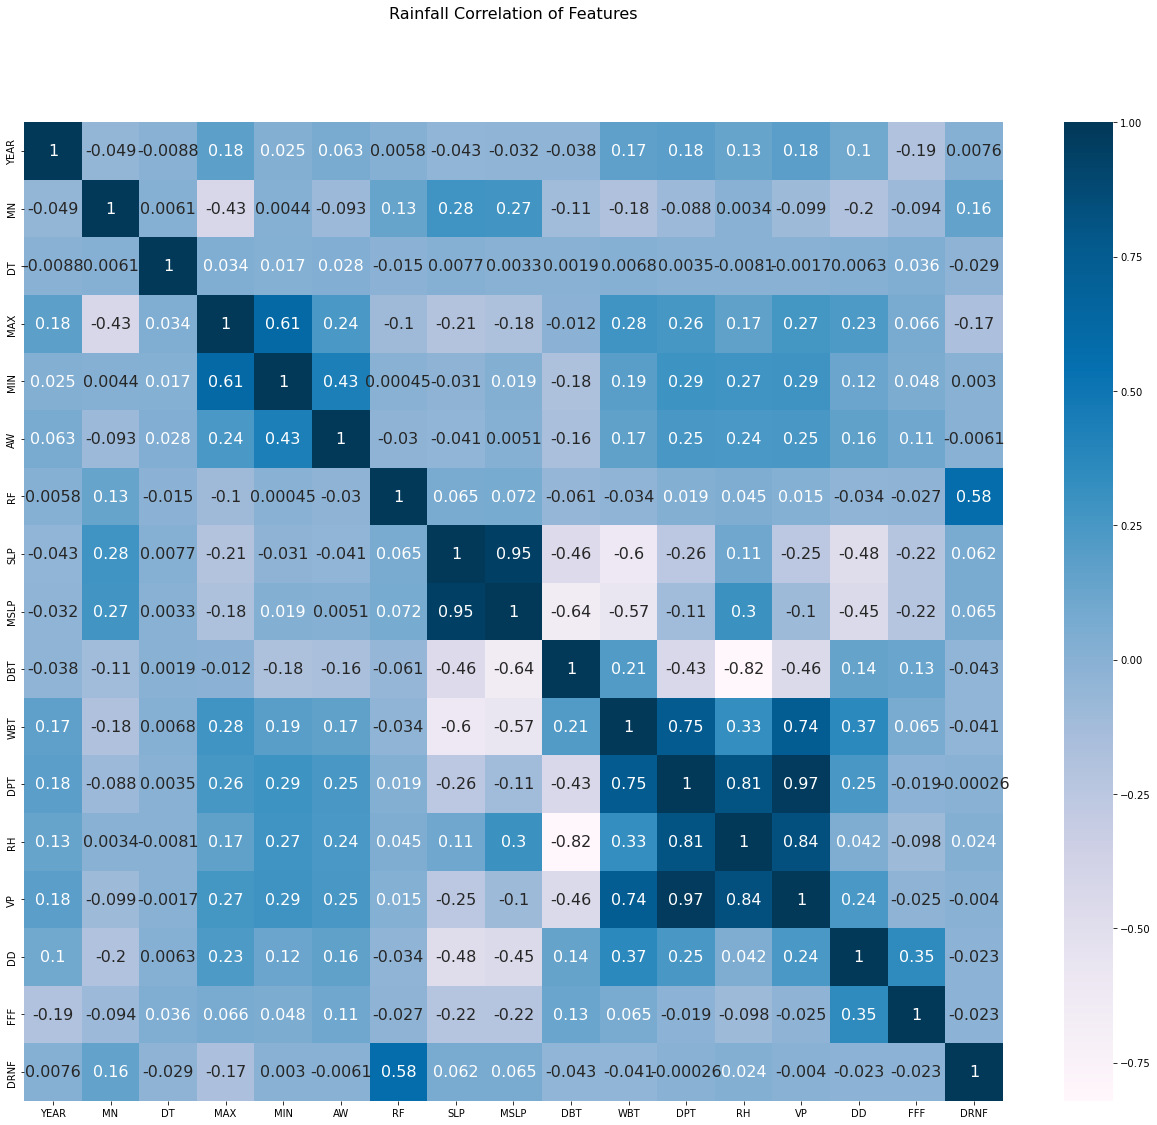

In [16]:
colormap = plt.cm.PuBu 
plt.figure(figsize=(22,18)) 
plt.title("Rainfall Correlation of Features", y = 1.1, size = 16) 
sns.heatmap(df.astype(int).corr(), linewidths = 0.0, vmax = 1.0, 
            square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})

In [17]:
features = df[['YEAR', 'MN', 'DT', 'MAX', 'MIN', 'AW', 'SLP', 'MSLP', 'DBT', 'WBT', 'DPT', 'RH', 'VP', 'DD', 'FFF', 'DRNF']]

In [18]:
Y = df['RF']
print(features)

      YEAR  MN  DT   MAX   MIN    AW    SLP    MSLP   DBT   WBT   DPT    RH  \
42    1985   2  15  32.7  18.5   5.0  928.6  1003.3  31.6  20.0  12.9  32.0   
43    1985   2  16  31.8  19.1   1.0  928.6  1003.3  31.8  19.6  11.8  30.0   
44    1985   2  17  30.6  18.6   2.0  927.7  1002.2  31.2  19.4  11.9  31.0   
45    1985   2  18  29.8  17.6   5.0  926.4  1001.1  31.0  19.4  12.0  31.0   
46    1985   2  19  28.8  17.4   3.0  927.4  1002.4  29.4  20.0  14.5  40.0   
...    ...  ..  ..   ...   ...   ...    ...     ...   ...   ...   ...   ...   
5937  2001   7  10  32.0  23.5  11.0  937.7  1014.8  25.0  20.0  17.3  62.0   
5938  2001   7  11  32.5  24.0  10.0  937.6  1014.7  24.4  21.0  19.3  73.0   
5939  2001   7  12  31.5  23.5   9.0  936.0  1013.0  25.0  19.0  15.5  56.0   
5940  2001   7  13  32.5  24.0   7.0  936.2  1013.4  23.8  19.2  16.6  64.0   
5941  2001   7  14  33.5  22.5   9.0  935.9  1013.1  23.4  18.8  16.1  64.0   

        VP    DD   FFF   DRNF  
42    14.9  18.0   

In [19]:
train_features, test_features, train_labels, test_labels = train_test_split(features, Y)

In [20]:
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
test_features = scaler.transform(test_features)
from sklearn import preprocessing
lab = preprocessing.LabelEncoder()
train_labels = lab.fit_transform(train_labels)


In [21]:
accuracy={}

# Linear Regression


In [22]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train_features, train_labels)

LinearRegression()

In [23]:
accuracy["Lin R"]=model.score(train_features, train_labels)
print("LinearRegression:",model.score(train_features, train_labels))

LinearRegression: 0.3557871861214509


In [24]:

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(train_features, train_labels)

C:\Users\Dharanidhar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
accuracy["Log R"]=model.score(train_features, train_labels)
print("LogisticRegression:",model.score(train_features, train_labels))


LogisticRegression: 0.783410138248848


In [26]:
from sklearn.linear_model import ARDRegression
model = ARDRegression()
model.fit(train_features, train_labels)


ARDRegression()

In [27]:
print(model.score(train_features, train_labels))

0.354879597344368


In [28]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(train_features, train_labels)


KNeighborsClassifier()

In [29]:
accuracy["KNN"]=model.score(train_features, train_labels)

print("K Nearest Neighbors:",model.score(train_features, train_labels))


K Nearest Neighbors: 0.7820276497695853


In [30]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion="entropy", max_depth=5)
model.fit(train_features, train_labels)


DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [31]:
DecisionTreeClassifier(criterion='entropy', max_depth=5)

accuracy["DTree"]=model.score(train_features, train_labels)

print("Decision Tree:",model.score(train_features, train_labels))


Decision Tree: 0.7741935483870968


In [32]:
from sklearn import svm
model = svm.SVC()
model.fit(train_features, train_labels)


SVC()

In [33]:


accuracy["SVM"]=model.score(train_features, train_labels)

print("Support Vector Machine:",model.score(train_features, train_labels))


Support Vector Machine: 0.7735023041474655


In [34]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(train_features, train_labels)


GaussianNB()

In [35]:
GaussianNB()

accuracy["NB"]=model.score(train_features, train_labels)

print("Naïve Bayes:",model.score(train_features, train_labels))


Naïve Bayes: 0.6806451612903226


In [36]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(train_features, train_labels)


RandomForestRegressor()

In [37]:
RandomForestRegressor()

accuracy["RF"]=model.score(train_features, train_labels)

print("Random Forest:",model.score(train_features, train_labels))


Random Forest: 0.9268304283662732


accuracy

In [38]:
accuracy

{'Lin R': 0.3557871861214509,
 'Log R': 0.783410138248848,
 'KNN': 0.7820276497695853,
 'DTree': 0.7741935483870968,
 'SVM': 0.7735023041474655,
 'NB': 0.6806451612903226,
 'RF': 0.9268304283662732}

<BarContainer object of 7 artists>

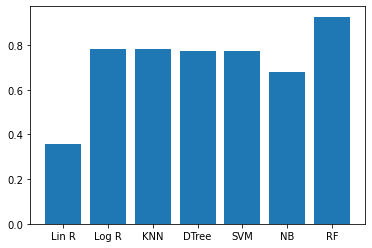

In [39]:
import matplotlib.pyplot as plt
algo=list(accuracy.keys())
accu=list(accuracy.values())
plt.bar(range(len(accuracy)),accu,tick_label=algo)


In [40]:
m=0
algorithm=''
for i in accuracy:
    if(accuracy[i]>m):
        m=accuracy[i]
        algorithm=i
print("The algorithm which provides highest algorithm is",algorithm,"with accuracy ",m)


The algorithm which provides highest algorithm is RF with accuracy  0.9268304283662732


Implementing the rangom forest 

In [41]:
def random_forest(l):
    train_features, test_features, train_labels, test_labels = train_test_split(features, Y)
    train_features.iloc[-1]=l
    model=RandomForestRegressor()
    model.fit(train_features, train_labels)
    predicted_value=model.predict(train_features)
    return predicted_value[-1]
user_input=[]
for i in features:
    print("Enter the value of ",i,":")
    user_input+=[float(input())]
phone_number=''
while(len(phone_number)!=10):
    phone_number=input('Enter the whatsapp number:')
    try:
        n=int(phone_number)
    except:
        print("Enter phone number is not valid.")
    if (len(phone_number)!=10):
        print("Enter phone number is not valid.")
    result =random_forest(user_input)


Enter the value of  YEAR :
2022
Enter the value of  MN :
223
Enter the value of  DT :
36
Enter the value of  MAX :
2
Enter the value of  MIN :
2
Enter the value of  AW :
2
Enter the value of  SLP :
1
Enter the value of  MSLP :
5
Enter the value of  DBT :
2
Enter the value of  WBT :
4
Enter the value of  DPT :
2
Enter the value of  RH :
13
Enter the value of  VP :
6
Enter the value of  DD :
3
Enter the value of  FFF :
1
Enter the value of  DRNF :
4
Enter the whatsapp number:9177963364


C:\Users\Dharanidhar\anaconda3\lib\site-packages\pandas\core\indexing.py:1797: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, v, pi)


In [47]:
message ="today rainfall is nearly "+str(result)

In [43]:
pip install pywhatkit

Note: you may need to restart the kernel to use updated packages.


In [49]:
from datetime import datetime
now = datetime.now()
time = now.strftime("%H:%M:%S")
h=int(time[0:2])
m=int(time[3:5])+2
print(h,m)

19 37


In [50]:
import pywhatkit
try:   
    # sending message to receiver
    # using pywhatkit
    p="+91"+phone_number
    pywhatkit.sendwhatmsg(p,message,h, m)
    
    print("Successfully Sent!")
except:
    print("An Unexpected Error!")


In 96 Seconds WhatsApp will open and after 15 Seconds Message will be Delivered!
Successfully Sent!


In [51]:
result

4.882999999999998